<a href="https://colab.research.google.com/github/Gebrealief/AugWAP/blob/master/stockPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: this prohram uses artfical recurrent neural ntk called long short memory (LSM)
#               to predict the closwing stock price of corporation (Apple Inc.) using the past 60 day stock price.

In [0]:
# Import the labrerties
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')



In [12]:
#Get the stock Quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-05-01')
#Show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2020-04-27,284.540009,279.950012,281.799988,283.170013,29271900.0,283.170013
2020-04-28,285.829987,278.200012,285.079987,278.579987,28001200.0,278.579987
2020-04-29,289.670013,283.890015,284.730011,287.730011,34320200.0,287.730011


In [11]:
#Get rows and columns of our data
df.shape

(2003, 6)

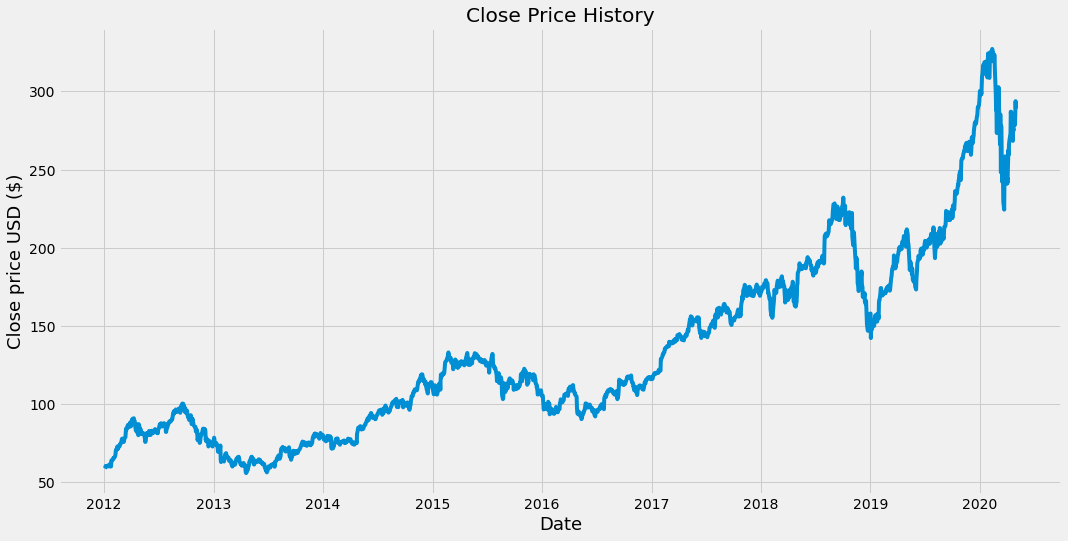

In [17]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.show()

In [0]:
# Create a new data frame with only close column
data= df.filter(['Close'])
#